# Project - Paris hotel and museum locations
### Applied geospatial data for business application

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data and Method](#data)
* [Analysis](#analysis)
* [Results and Discussion](#results)




## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a hotel. Specifically, this report will be targeted to stakeholders interested in opening an **hotel** in **Paris**, France.

Since there are lots of hotels, thousands in Paris already, we will try to detect **locations that are not already crowded with hotels**. We are also particularly interested in **hotels that are very close museums**. because choose hotels based on walking distance to major museums. With google and experdia provides geolocation info, today's travelers are better informed than ever before.  Because many visitors spend lots of time going to those museums, how close the hotel to museums become determining factors in making choices.  

We will use our data science powers to generate most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of existing hotels near major museums 
* number of and distance to major museums in the neighborhood, if any

Following data sources will be needed to extract/generate the required information:
* Major museums in Paris.  use **Foursquare Maps search**
* Find geolocation data of those museums, using **Foursquare API**
* based on geolcation data, find out how many hotels are near each museum, and distance between those hotels and the major musuem

### Museums Candidates in Paris

Let's search and download latitude & longitude coordinates for all major museums in Paris. First we search all museum in 10km circle of Paris's center area.  I use Musee der Louvre as the city's landmark

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [ ]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
import requests

address = 'musee louvre, paris'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(longitude,latitude)



2.3460263 48.8559492


In [ ]:


CLIENT_ID='TYA12D30SGILHZKK3OMGASL5PB141TTBLGZPZJFI3SMMAZPB'
CLIENT_SECRET='H1BHR3AMZ1UA5KJTNGQQLGKSUE53LAPMVG45IEE15ATCGI2I'


VERSION='20200630'
search_query ='museum'
radius=100000
LIMIT=200

paris_museum=[latitude, longitude]


url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
results




In [ ]:
venues=results['response']['venues']
df = json_normalize(venues)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,5a58f039065ef50b1f0addbc,Museum national d'histoire naturelle,"[{'id': '4bf58dd8d48988d191941735', 'name': 'S...",v-1594393509,False,57 rue Cuvier,48.844320,2.356187,"[{'label': 'display', 'lat': 48.84432, 'lng': ...",1493,75005,FR,Paris,Île-de-France,France,"[57 rue Cuvier, 75005 Paris, France]",NaN,NaN,NaN
1,50b356c3e4b0d67c9a2cd74c,Bibliothèque Centrale du Museum National d'His...,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1594393509,False,38 rue Geoffroy-Saint-Hilaire,48.842600,2.355857,"[{'label': 'display', 'lat': 48.84260006303128...",1651,75005,FR,Paris,Île-de-France,France,"[38 rue Geoffroy-Saint-Hilaire, 75005 Paris, F...",NaN,NaN,NaN
2,4bde7569ffdec92829cae8a1,Galerie des Enfants du Muséum d'Histoire Natur...,"[{'id': '4bf58dd8d48988d191941735', 'name': 'S...",v-1594393509,False,Grande Galerie de l'Évolution,48.842102,2.356178,"[{'label': 'display', 'lat': 48.84210226236579...",1711,75005,FR,Paris,Île-de-France,France,[Grande Galerie de l'Évolution (36 rue Geoffro...,36 rue Geoffroy Saint-Hilaire,NaN,NaN
3,5574bd41498ed7be4e0806bd,Studio near Chatelet/Louvre museum,"[{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...",v-1594393509,False,Rue des Bourdonnais,48.860092,2.344984,"[{'label': 'display', 'lat': 48.86009201431173...",467,75001,FR,Paris,Île-de-France,France,"[Rue des Bourdonnais, 75001 Paris, France]",NaN,NaN,NaN
4,52f53832498e83d649ef3e97,Société des amis du museum,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",v-1594393509,False,57 Rue Cuvier,48.851611,2.343273,"[{'label': 'display', 'lat': 48.85161142085224...",523,75005,FR,Paris,Île-de-France,France,"[57 Rue Cuvier, 75005 Paris, France]",NaN,NaN,NaN


In [ ]:
df.shape

(38, 19)

# In total, we find 38 major museums in metropolitan area of Paris.  
##Lets see those 38 museum on a folium map

In [ ]:

import folium

location= (longitude,latitude)
Paris_map = folium.Map(location, zoom_start=10)

# create map of New York using latitude and longitude values
# add markers to map

for lat, lng, name, address in zip(df['location.lat'], df['location.lng'], df['name'], df['location.address']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat,lng],
#       radius=5,
        popup=label,
#       color='blue',
#       fill=True,
#      fill_color='#3186cc',
#       fill_opacity=0.7,
#        parse_html=False
).add_to(Paris_map)  
    
Paris_map



Let's visualize the data we have so far: city center, and major museum in Paris

## use Foursquare to find hotels location and distance
Now that we have our location candidates, let's use Foursquare API to get info on hotels near each musem.

We're interested hotels that are in walking, short distance to each museum.  specificaly, we are interested in hotels that are in 300 meters range of each 38 museums. 

## try to find hotels near those museum in paris

In [ ]:

def find_hotel(name, latitude, longitude):

        CLIENT_ID='TYA12D30SGILHZKK3OMGASL5PB141TTBLGZPZJFI3SMMAZPB'
        CLIENT_SECRET='H1BHR3AMZ1UA5KJTNGQQLGKSUE53LAPMVG45IEE15ATCGI2I'
        
        VERSION='20200630'
        search_query ='hotel'
        radius=300
        LIMIT=100

        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            latitude, 
            longitude,
            VERSION, 
            search_query, 
            radius, 
            LIMIT)

        results = requests.get(url).json()
        venues = results['response']['venues']
        df2 = pd.json_normalize(venues)

# tranform venues into a dataframe
        df3=df2[['name', 'location.address','location.lat','location.lng','location.distance']]
        df3['museum_name']=name

        return df3


In [ ]:
name,longitude,lattitude='musee de louvre', 2.3460263, 48.8559492
df3a=find_hotel(name, latitude, longitude)
df3a


columns=['name', 'location.address', 'location.lat', 'location.lng', 'museum_name']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df4=pd.DataFrame()

names, latitudes, longitudes = df['name'],df['location.lat'], df['location.lng']

for name, lattitude, longitude in zip(names, latitudes, longitudes):

    df3=pd.DataFrame(find_hotel(name, latitude, longitude))
    df4=pd.concat([df4,df3])



In [ ]:
df34=pd.concat([df3a, df4])

df34

,name,location.address,location.lat,location.lng,location.distance,museum_name
0,Hôpital Hôtel-Dieu,1 place du Parvis Notre-Dame,48.854264,2.348327,252,musee de louvre
1,Hôtel Louvre Rivoli,7 rue Jean Lantier,48.858501,2.346504,286,musee de louvre
2,Hôtel Victoria Châtelet Paris,17 avenue Victoria,48.858120,2.346642,245,musee de louvre
3,Hôtel Britannique,20 avenue Victoria,48.858155,2.346339,246,musee de louvre
4,Hôtel Elixir,7 Rue Jean Lantier,48.858553,2.346538,292,musee de louvre
...,...,...,...,...,...,...
11,Hôtel Gouffier de Thoix,56 rue de Varenne,48.854800,2.321836,356,BLR Museum
12,Ministère de l'Éducation Nationale,110 rue de Grenelle,48.856647,2.320890,274,BLR Museum
0,Hotel De Ville de Serris,1 Place Gibraltar,48.856477,2.785602,142,Bmw Museum
1,Hôtel l'Elysée Val d'Europe,NaN,48.852835,2.783267,349,Bmw Museum


# In total, we found 1069 hotels that in walking distance from 38 major museums.  Our projects are to find a location to build a new hotel.  Hence, we like to find out which museums that have least hotels around them.  

## Lets count how many hotels are around each museum in 300 meters range. 

In [ ]:

hotel_count=df34.groupby(['museum_name']).count()

hotel_count

,name,location.address,location.lat,location.lng,location.distance
museum_name,,,,,
Agence France Museums,48,40,48,48,48
BLR Museum,13,12,13,13,13
Bibliothèque Centrale du Museum National d'Histoire Naturelle,50,39,50,50,50
Bmw Museum,3,2,3,3,3
Bâtiment de la Baleine,47,39,47,47,47
CHANEL Home & Museum,27,23,27,27,27
Centre Pompidou – Musée National d'Art Moderne,50,40,50,50,50
Deck of the Orsay Museum,30,26,30,30,30
Galerie des Enfants du Muséum d'Histoire Naturelle,50,40,50,50,50


## Also, lets see what is average distance between each museum and hotels

In [ ]:
hotel_distance=df34.groupby(['museum_name']).mean()
hotel_distance

,location.lat,location.lng,location.distance
museum_name,,,
Agence France Museums,48.856473,2.350205,255.770833
BLR Museum,48.855472,2.318811,204.076923
Bibliothèque Centrale du Museum National d'Histoire Naturelle,48.856262,2.355067,207.000000
Bmw Museum,48.855044,2.785230,236.666667
Bâtiment de la Baleine,48.856353,2.357583,233.085106
CHANEL Home & Museum,48.856364,2.326408,226.481481
Centre Pompidou – Musée National d'Art Moderne,48.856612,2.352193,218.800000
Deck of the Orsay Museum,48.856316,2.326868,239.266667
Galerie des Enfants du Muséum d'Histoire Naturelle,48.856216,2.355793,223.140000


###Let's now analyse the nubmer of hotels and distance seperately. 

In [ ]:
hotel_count['name']

museum_name
Agence France Museums                                            48
BLR Museum                                                       13
Bibliothèque Centrale du Museum National d'Histoire Naturelle    50
Bmw Museum                                                        3
Bâtiment de la Baleine                                           47
CHANEL Home & Museum                                             27
Centre Pompidou – Musée National d'Art Moderne                   50
Deck of the Orsay Museum                                         30
Galerie des Enfants du Muséum d'Histoire Naturelle               50
Grand Amphitheatre                                               46
Grande Galerie de l'Évolution (Grande Galerie de l'évolution)    50
Jazz Museum                                                      26
La Boutique des Catacombes                                       36
La Civette du Carrousel - Museum Pass                            33
Lauvre Museum                       

In [ ]:
hotel_distance['location.distance']

museum_name
Agence France Museums                                            255.770833
BLR Museum                                                       204.076923
Bibliothèque Centrale du Museum National d'Histoire Naturelle    207.000000
Bmw Museum                                                       236.666667
Bâtiment de la Baleine                                           233.085106
CHANEL Home & Museum                                             226.481481
Centre Pompidou – Musée National d'Art Moderne                   218.800000
Deck of the Orsay Museum                                         239.266667
Galerie des Enfants du Muséum d'Histoire Naturelle               223.140000
Grand Amphitheatre                                               215.326087
Grande Galerie de l'Évolution (Grande Galerie de l'évolution)    223.700000
Jazz Museum                                                      245.038462
La Boutique des Catacombes                                       203.666667


# Plot the number of hotels near each museums

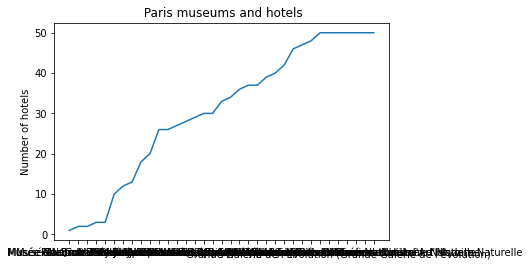

In [ ]:
import matplotlib.pyplot as plt

x=hotel_count['name'].sort_values()
y=hotel_distance['location.distance']
plt.title(' Paris museums and hotels')
plt.ylabel('Number of hotels')
plt.plot(x)


## Box plot of the number of hotels near each museum

<function matplotlib.pyplot.show>

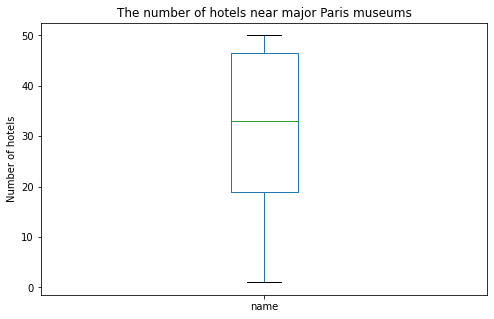

In [ ]:
data['name'].plot(kind='box', figsize=(8,5))
plt.title('The number of hotels near major Paris museums')
plt.ylabel('Number of hotels')
plt.show

## Methodology <a name="methodology"></a>

So now we have all the hotels in area within 300 meters from 38 major museums, and we also know the distribution of the number with linear plot and boxplot 

Lets analyse how many clusters of those number we should segment them into.  We would like to know: 
##which groupd of museums are over-served by hotels (i.e. >40 hotels surrounding them
##which groupd of museums are moderately-served by hotels (i.e. between 10 and 40 hotels surrounding them
##which groupd of museums are under-served by hotels (i.e. less than 10 hotels surrounding them

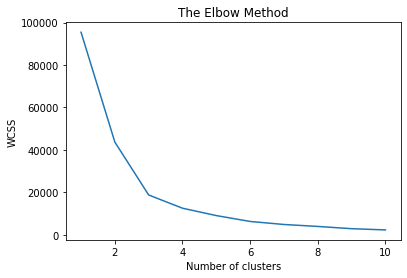

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Use elbow method of Kmeans from SKlearn, the graph clearly show that 3 is the segment number of those hotels categories.  This results is consistent with our qualitatiive hypothesis that museums can be categorized into 3 segment:  over-servied, moderate-served, and under-served.
## Our business interest is find the museum and its location that are less crowded with hotels.  we want to build a new hotel near the museum

In [ ]:
data=pd.concat([hotel_count['name'],hotel_distance['location.distance']], axis=1)
column_index='museum_name'
data

,name,location.distance
museum_name,,
Agence France Museums,48,255.770833
BLR Museum,13,204.076923
Bibliothèque Centrale du Museum National d'Histoire Naturelle,50,207.000000
Bmw Museum,3,236.666667
Bâtiment de la Baleine,47,233.085106
CHANEL Home & Museum,27,226.481481
Centre Pompidou – Musée National d'Art Moderne,50,218.800000
Deck of the Orsay Museum,30,239.266667
Galerie des Enfants du Muséum d'Histoire Naturelle,50,223.140000


In [ ]:
data['category'] =data['name'].values


In [ ]:

data['category'][data['name']>10]=0

data['category'][data['name']<10]=1

data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,name,location.distance,category
museum_name,,,
Agence France Museums,48,255.770833,0
BLR Museum,13,204.076923,0
Bibliothèque Centrale du Museum National d'Histoire Naturelle,50,207.000000,0
Bmw Museum,3,236.666667,1
Bâtiment de la Baleine,47,233.085106,0
CHANEL Home & Museum,27,226.481481,0
Centre Pompidou – Musée National d'Art Moderne,50,218.800000,0
Deck of the Orsay Museum,30,239.266667,0
Galerie des Enfants du Muséum d'Histoire Naturelle,50,223.140000,0


In [ ]:
x=np.array(data[['name','location.distance']])
y=np.array(data['category'])


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 3)
classifier.fit(x, y)

np.mean(y==classifier.predict(x))

0.8285714285714286

# finally we use KNN classifier to check the prediciton of clusters, with real outcomes.  We found the accuracy to be around 83%. 

## Results and Discussion <a name="results"></a>

In [ ]:
hotel_count['name'][hotel_count['name']<10]

museum_name
Bmw Museum                               3
Musée Marmottan Monet                    1
Musée National de la Marine              2
Musée du Quai Branly – Jacques Chirac    3
Palais de Tokyo                          2
Name: name, dtype: int64

# Hence, we selected following 5 museums as locations to build a new hotel. 

## BMW Museum  
## Musée Marmottan Monet  
## Musée National de la Marine   
## Musée du Quai Branly – Jacques Chirac    
## Palais de Tokyo                          



## Conclusion <a name="conclusion"></a>

In summary, we  direct our efforts on detecting areas of Paris that have low hotel density, particularly those with low number of hotels near major museums. We will limit our analysis to area ~10km around city center.

In first step we have collected the required **museums that are in 10km of the Paris city center** ). We then searched have also **hotels near those musuems** (according to Foursquare search).

Second step in our analysis, we calculation and exploration of '**hotel  density** near each museum.  we segment museums into over, moderate, and under -served categories use elbow method of kmeans. we also used KNN model to classify those hotels into 3 catogories. 

In last step we  focus on most promising areas, and within those create **clusters of locations that meet some basic requirements** established in discussion. we will take into consideration locations with **less than 10 hotels within 300 meters**.  We will present map of all such locations also create clusters (using **kmeans elbow**) of those locations to identify general addresses which should be a starting point for final 'street level' search for optimal  location for a new hotel.